### 导包

In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.applications.xception import Xception
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, merge, Input
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.models import model_from_json
from keras import backend as K
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.utils.data_utils import get_file
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.applications.xception import preprocess_input, decode_predictions
import random


%matplotlib inline

C:\Users\yijig\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 解压

In [2]:
from zipfile import ZipFile
with ZipFile("train.zip", 'r') as f:
    f.extractall()
with ZipFile("test.zip", 'r') as f:
    f.extractall()

### 去除异常值

In [2]:
dogs = [
 'n02085620','n02085782','n02085936','n02086079'
,'n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364'
,'n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721'
,'n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339'
,'n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258'
,'n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437'
,'n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105'
,'n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236'
,'n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177'
,'n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251'
,'n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550'
,'n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089'
,'n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185'
,'n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889'
,'n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712'
,'n02113799','n02113978']

cats=[
'n02123045','n02123159','n02123394','n02123597'
,'n02124075','n02125311','n02127052']

In [3]:
model_err = Xception(weights='imagenet')

def is_err_img(img_path):
    img = image.load_img(img_path, target_size=(299,299))
    x = image.img_to_array(img)
    
    x = preprocess_input(x)
    preds = np.array(decode_predictions(model_err.predict(x), top=40)[0])
    
    is_err = True
    for pred in preds[:, 0]:
        if pred in dogs or pred in cats:
            is_err = False
    return is_err  

In [4]:
len(os.listdir('train/'))

25000

In [5]:
err_list = []

for img in os.listdir('train/'):
    if is_err_img(f'train/{img}'):
        err_list.append(img)
        
len(err_list)

39

In [8]:
err_list

['cat.12424.jpg',
 'dog.3889.jpg',
 'cat.12476.jpg',
 'cat.9171.jpg',
 'dog.6725.jpg',
 'cat.5418.jpg',
 'cat.4688.jpg',
 'cat.7564.jpg',
 'cat.2939.jpg',
 'cat.5351.jpg',
 'cat.7377.jpg',
 'dog.9517.jpg',
 'dog.10237.jpg',
 'dog.9188.jpg',
 'dog.6475.jpg',
 'dog.5604.jpg',
 'dog.10161.jpg',
 'cat.8470.jpg',
 'cat.10636.jpg',
 'dog.1895.jpg',
 'dog.10801.jpg',
 'cat.11184.jpg',
 'cat.10029.jpg',
 'dog.1773.jpg',
 'cat.5071.jpg',
 'cat.8456.jpg',
 'dog.11299.jpg',
 'dog.2614.jpg',
 'cat.7968.jpg',
 'dog.1259.jpg',
 'cat.10712.jpg',
 'dog.8898.jpg',
 'dog.4367.jpg',
 'dog.12376.jpg',
 'dog.8736.jpg',
 'dog.10190.jpg',
 'cat.4338.jpg',
 'cat.3216.jpg',
 'cat.3672.jpg']

In [2]:
err_list = ['cat.12424.jpg',
 'dog.3889.jpg',
 'cat.12476.jpg',
 'cat.9171.jpg',
 'dog.6725.jpg',
 'cat.5418.jpg',
 'cat.4688.jpg',
 'cat.7564.jpg',
 'cat.2939.jpg',
 'cat.5351.jpg',
 'cat.7377.jpg',
 'dog.9517.jpg',
 'dog.10237.jpg',
 'dog.9188.jpg',
 'dog.6475.jpg',
 'dog.5604.jpg',
 'dog.10161.jpg',
 'cat.8470.jpg',
 'cat.10636.jpg',
 'dog.1895.jpg',
 'dog.10801.jpg',
 'cat.11184.jpg',
 'cat.10029.jpg',
 'dog.1773.jpg',
 'cat.5071.jpg',
 'cat.8456.jpg',
 'dog.11299.jpg',
 'dog.2614.jpg',
 'cat.7968.jpg',
 'dog.1259.jpg',
 'cat.10712.jpg',
 'dog.8898.jpg',
 'dog.4367.jpg',
 'dog.12376.jpg',
 'dog.8736.jpg',
 'dog.10190.jpg',
 'cat.4338.jpg',
 'cat.3216.jpg',
 'cat.3672.jpg']

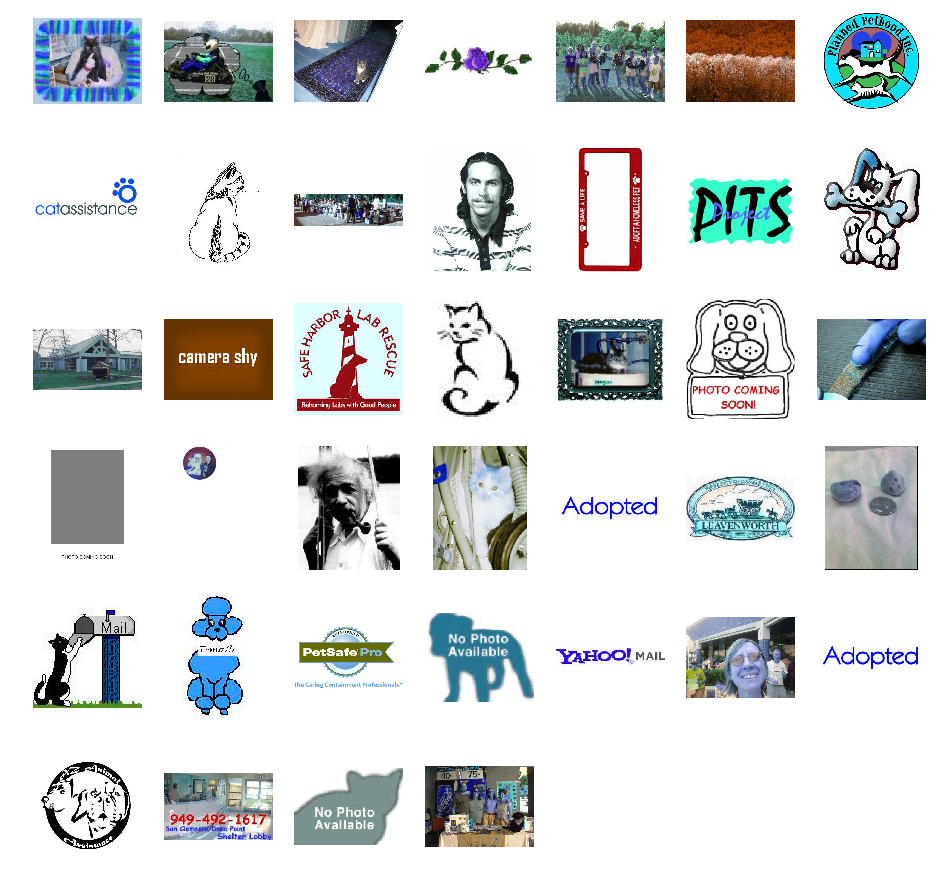

In [3]:
import cv2
plt.figure(figsize=(16, 16))
for i, img in enumerate(err_list):
    im = cv2.imread(f'../dogs_vs_cats-master/train/{img}')
    plt.subplot(6, 7, i+1)
    plt.axis('off')
    plt.imshow(im)

In [2]:
# 去除异常值
err_list = ['cat.12424.jpg', 'dog.3889.jpg', 'cat.12476.jpg', 'cat.9171.jpg', 'dog.6725.jpg', 'cat.5418.jpg',
 'cat.4688.jpg', 'cat.7564.jpg', 'cat.2939.jpg', 'cat.5351.jpg', 'cat.7377.jpg', 'dog.9517.jpg', 'dog.10237.jpg',
 'dog.9188.jpg', 'dog.6475.jpg', 'dog.5604.jpg', 'dog.10161.jpg', 'cat.8470.jpg', 'cat.10636.jpg', 'dog.1895.jpg',
 'dog.10801.jpg', 'cat.11184.jpg', 'cat.10029.jpg', 'dog.1773.jpg', 'cat.5071.jpg', 'cat.8456.jpg', 'dog.11299.jpg',
'dog.2614.jpg', 'cat.7968.jpg', 'dog.1259.jpg', 'cat.10712.jpg', 'dog.8898.jpg', 'dog.4367.jpg', 'dog.12376.jpg', 'dog.8736.jpg',
 'dog.10190.jpg', 'cat.4338.jpg', 'cat.3216.jpg', 'cat.3672.jpg']

In [4]:
# 去除异常值
for i in os.listdir("train/"):
    if i in err_list:
        os.remove(f'train/{i}')

len(os.listdir('train/'))

24961